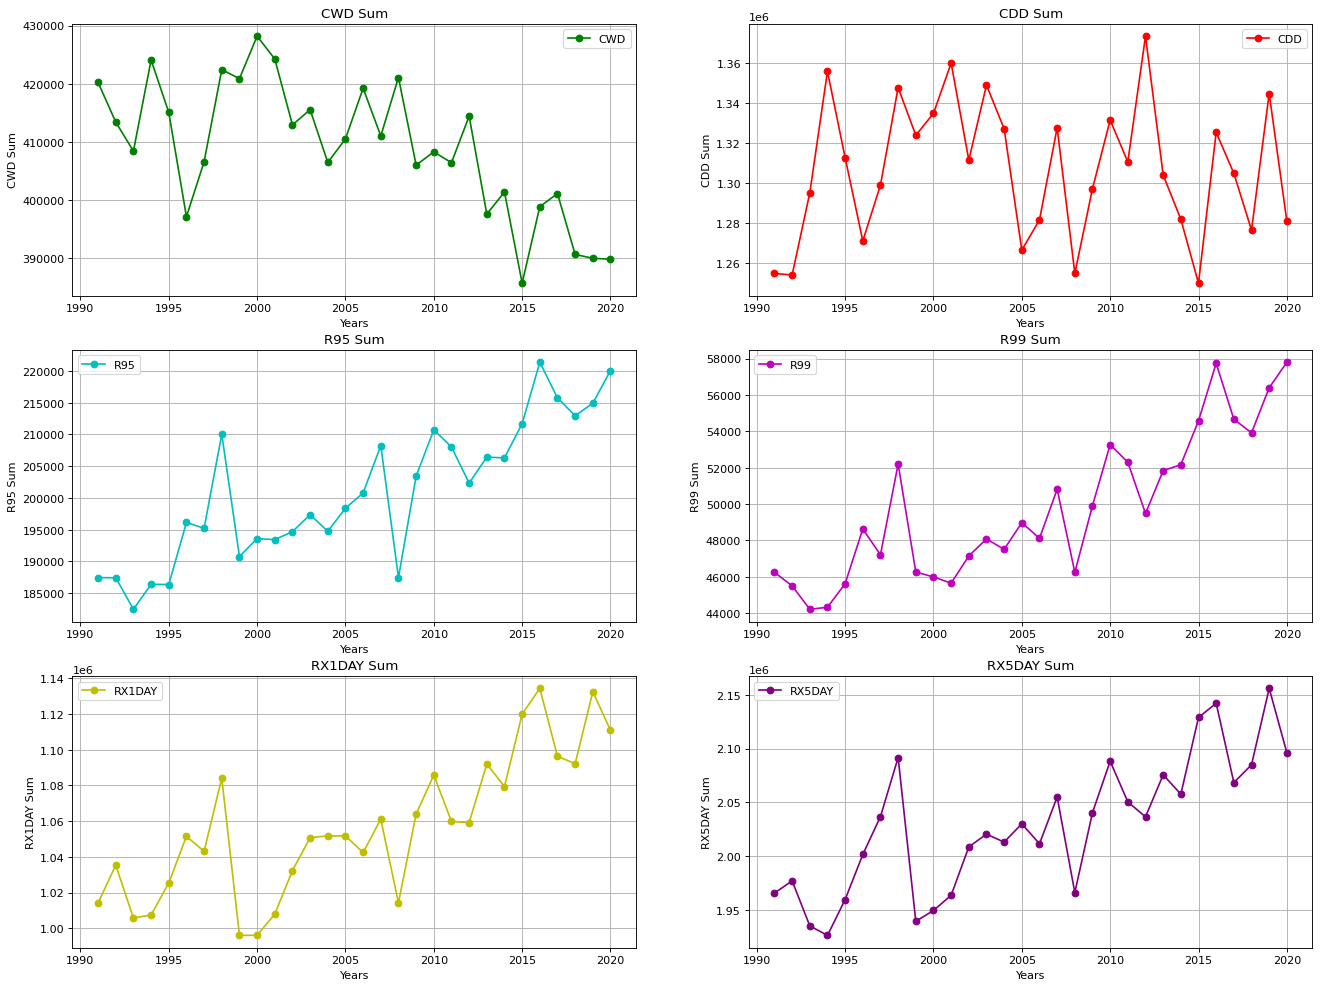

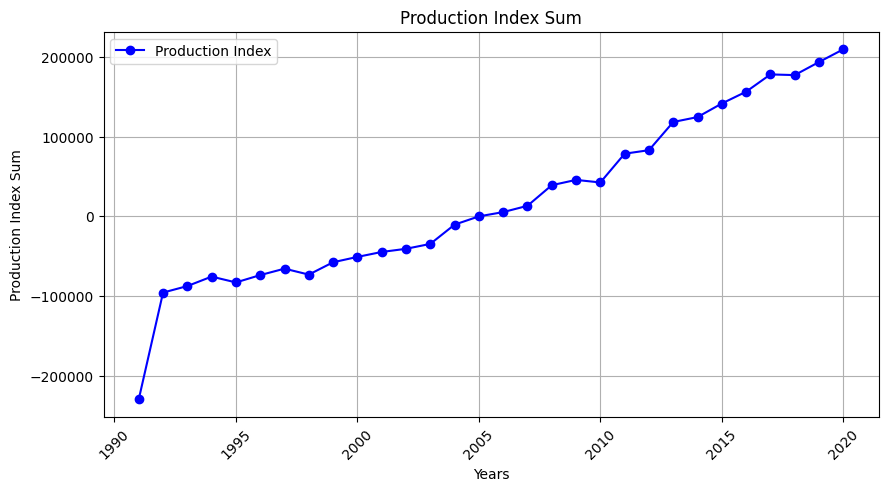

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.io as pio
import json
import requests
import folium
import json
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML  # Jupyter 환경에서 애니메이션을 시각화
import numpy as np
file_path_r95 = '/root/notenotenote/r95_era5_1991-2020.nc'
file_path_r99 = '/root/notenotenote/r99_era5_1991-2020.nc'
file_path_rx1day = '/root/notenotenote/rx1day_era5_1991-2020.nc'
file_path_rx5day = '/root/notenotenote/rx5day_era5_1991-2020.nc'
file_path_cwd = '/root/notenotenote/cwd_era5_1991-2020.nc'
file_path_cdd = '/root/notenotenote/cdd_era5_1991-2020.nc'
# combined_production_index 읽기
com_product_idx = 'https://github.com/swany00/2024_CML/raw/refs/heads/main/combined_production_index.json'
com_product_idx = json.loads(requests.get(com_product_idx).text)
production_index = com_product_idx['data_vars']
production_index_values = list(production_index.values())[0]['data']
production_index_values=np.array(production_index_values)

# 데이터 로드
r95 = xr.open_dataset(file_path_r95, decode_times=False)['r95'].values
r99 = xr.open_dataset(file_path_r99, decode_times=False)['r99'].values
rx1day = xr.open_dataset(file_path_rx1day, decode_times=False)['rx1day'].values
rx5day = xr.open_dataset(file_path_rx5day, decode_times=False)['rx5day'].values
cwd = xr.open_dataset(file_path_cwd, decode_times=False)['cwd'].values
cdd = xr.open_dataset(file_path_cdd, decode_times=False)['cdd'].values
# 그래프 그리기 함수
def plot_extreme_rainfall_graphs(production_index_values, cwd, cdd, r95, r99, rx1day, rx5day):
    """
    각 extreme rainfall 데이터를 기반으로 그래프를 그리는 함수입니다.
    """
    # x축을 1부터 30년으로 설정
    years = np.arange(1991, 2021)
    
    # 기준 값 (production_index_values[14]) 계산
    piv15 = np.nansum(production_index_values[14])

    # 각 데이터 항목의 연도별 합계 계산 후 piv15 빼기
    po = [np.nansum(rx1day[i]) for i in range(30)]
    co = [np.nansum(rx5day[i]) for i in range(30)]
    cdd_sum = [np.nansum(cdd[i]) for i in range(30)]
    cwd_sum = [np.nansum(cwd[i]) for i in range(30)]
    r95_sum = [np.nansum(r95[i]) for i in range(30)]
    r99_sum = [np.nansum(r99[i]) for i in range(30)]
    production_index_sum = [np.nansum(production_index_values[i])-piv15 for i in range(30)]

    # 그래프 그리기
    plt.figure(figsize=(20, 15), dpi=80, )
    # Formatter 설정 (천 단위 구분 및 가독성 좋은 형식)
    def thousands_formatter(x, pos):
        return f'{x*1e-6:.1f}M'  # 1,000,000 단위로 표기

    # Production Index 그래프
    plt.subplot(3, 2, 6)
    plt.plot(years, co, marker='o', color='purple', label='RX5DAY')
    plt.xlabel('Years')
    plt.ylabel('RX5DAY Sum')
    plt.title('RX5DAY Sum')
    plt.grid()
    plt.legend()
    # CWD 그래프
    plt.subplot(3, 2, 1)
    plt.plot(years, cwd_sum, marker='o', color='g', label='CWD')
    plt.xlabel('Years')
    plt.ylabel('CWD Sum')
    plt.title('CWD Sum')
    plt.grid()
    plt.legend()

    # CDD 그래프
    plt.subplot(3, 2, 2)
    plt.plot(years, cdd_sum, marker='o', color='r', label='CDD')
    plt.xlabel('Years')
    plt.ylabel('CDD Sum')
    plt.title('CDD Sum')
    plt.grid()
    plt.legend()

    # R95 그래프
    plt.subplot(3, 2, 3)
    plt.plot(years, r95_sum, marker='o', color='c', label='R95')
    plt.xlabel('Years')
    plt.ylabel('R95 Sum')
    plt.title('R95 Sum')
    plt.grid()
    plt.legend()

    # R99 그래프
    plt.subplot(3, 2, 4)
    plt.plot(years, r99_sum, marker='o', color='m', label='R99')
    plt.xlabel('Years')
    plt.ylabel('R99 Sum')
    plt.title('R99 Sum')
    plt.grid()
    plt.legend()

    # RX1DAY 그래프
    plt.subplot(3, 2, 5)
    plt.plot(years, po, marker='o', color='y', label='RX1DAY')
    plt.xlabel('Years')
    plt.ylabel('RX1DAY Sum')
    plt.title('RX1DAY Sum')
    plt.grid()
    plt.legend()

    # RX5DAY 그래프
    plt.figure(figsize=(10, 5))
    plt.plot(years, production_index_sum, marker='o', color='b', label='Production Index')
    plt.xlabel('Years')
    plt.ylabel('Production Index Sum')
    plt.title('Production Index Sum')
    plt.grid()
    plt.legend()
    # 서브플롯 간 간격을 넓히기 위한 설정
    plt.subplots_adjust(hspace=0.5, wspace=0.5)  # 세로 간격을 넓힘

    # x축 레이블 회전 (겹침 방지)
    for ax in plt.gcf().get_axes():
        ax.tick_params(axis='x', rotation=45)
    plt.show()


plot_extreme_rainfall_graphs(production_index_values, cwd, cdd, r95, r99, rx1day, rx5day)


In [22]:
import xarray as xr
import numpy as np
import json
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import requests

# 경향성 분석에 필요한 데이터 로드
file_path_r95 = '/root/notenotenote/r95_era5_1991-2020.nc'
file_path_r99 = '/root/notenotenote/r99_era5_1991-2020.nc'
file_path_rx1day = '/root/notenotenote/rx1day_era5_1991-2020.nc'
file_path_rx5day = '/root/notenotenote/rx5day_era5_1991-2020.nc'
file_path_cwd = '/root/notenotenote/cwd_era5_1991-2020.nc'
file_path_cdd = '/root/notenotenote/cdd_era5_1991-2020.nc'

# combined_production_index 읽기
com_product_idx = 'https://github.com/swany00/2024_CML/raw/refs/heads/main/combined_production_index.json'
com_product_idx = json.loads(requests.get(com_product_idx).text)
production_index = com_product_idx['data_vars']
production_index_values = list(production_index.values())[0]['data']
production_index_values = np.array(production_index_values)

# 총 배출량(백만 톤 CO2eq.)
emissions = np.array([
    315.4, 343.4, 378.5, 403.6, 433.8, 470.3, 501.9, 431.4, 469.4, 502.7, 516.0, 
    538.5, 548.8, 557.0, 561.5, 566.9, 580.2, 593.5, 597.3, 655.1, 683.8, 687.0, 695.7, 
    690.8, 691.3, 692.4, 709.4, 725.0, 699.2, 654.4
])

# 데이터 로드
r95 = xr.open_dataset(file_path_r95, decode_times=False)['r95'].values
r99 = xr.open_dataset(file_path_r99, decode_times=False)['r99'].values
rx1day = xr.open_dataset(file_path_rx1day, decode_times=False)['rx1day'].values
rx5day = xr.open_dataset(file_path_rx5day, decode_times=False)['rx5day'].values
cwd = xr.open_dataset(file_path_cwd, decode_times=False)['cwd'].values
cdd = xr.open_dataset(file_path_cdd, decode_times=False)['cdd'].values

# 그래프 그리기 함수
def plot_extreme_rainfall_graphs(production_index_values, cwd, cdd, r95, r99, rx1day, rx5day, emissions):
    """
    각 extreme rainfall 데이터를 기반으로 그래프를 그리는 함수입니다.
    """
    # x축을 1991년부터 2021년까지 설정
    years = np.arange(1991, 2021)

    # 기준 값 (production_index_values[14]) 계산
    piv15 = np.nansum(production_index_values[14])

    # 각 데이터 항목의 연도별 합계 계산 후 piv15 빼기
    po = [np.nansum(rx1day[i]) for i in range(30)]
    co = [np.nansum(rx5day[i]) for i in range(30)]
    cdd_sum = [np.nansum(cdd[i]) for i in range(30)]
    cwd_sum = [np.nansum(cwd[i]) for i in range(30)]
    r95_sum = [np.nansum(r95[i]) for i in range(30)]
    r99_sum = [np.nansum(r99[i]) for i in range(30)]
    production_index_sum = [np.nansum(production_index_values[i])-piv15 for i in range(30)]

    # 서브플롯을 키우기 위해서 figsize 설정
    fig, axs = plt.subplots(3, 2, figsize=(25, 20), dpi=80)  # 그래프 크기를 더 크게 설정

    # Formatter 설정 (천 단위 구분 및 가독성 좋은 형식)
    def thousands_formatter(x, pos):
        return f'{x*1e-6:.1f}M'  # 1,000,000 단위로 표기

    # R95 그래프
    axs[0, 0].plot(years, r95_sum, marker='o', color='c', label='R95')
    axs[0, 0].set_xlabel('Years', fontsize=12)
    axs[0, 0].set_ylabel('R95 Sum', fontsize=12)
    axs[0, 0].set_title('R95 Sum', fontsize=14)
    axs[0, 0].grid(True)
    axs[0, 0].legend()
    axs[0, 0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # R99 그래프
    axs[0, 1].plot(years, r99_sum, marker='o', color='m', label='R99')
    axs[0, 1].set_xlabel('Years', fontsize=12)
    axs[0, 1].set_ylabel('R99 Sum', fontsize=12)
    axs[0, 1].set_title('R99 Sum', fontsize=14)
    axs[0, 1].grid(True)
    axs[0, 1].legend()
    axs[0, 1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # RX1DAY 그래프
    axs[1, 1].plot(years, po, marker='o', color='y', label='RX1DAY')
    axs[1, 1].set_xlabel('Years', fontsize=12)
    axs[1, 1].set_ylabel('RX1DAY Sum', fontsize=12)
    axs[1, 1].set_title('RX1DAY Sum', fontsize=14)
    axs[1, 1].grid(True)
    axs[1, 1].legend()
    axs[1, 1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # RX5DAY 그래프
    axs[2, 1].plot(years, co, marker='o', color='purple', label='RX5DAY')
    axs[2, 1].set_xlabel('Years', fontsize=12)
    axs[2, 1].set_ylabel('RX5DAY Sum', fontsize=12)
    axs[2, 1].set_title('RX5DAY Sum', fontsize=14)
    axs[2, 1].grid(True)
    axs[2, 1].legend()
    axs[2, 1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # CWD 그래프
    axs[1, 0].plot(years, cwd_sum, marker='o', color='g', label='CWD')
    axs[1, 0].set_xlabel('Years', fontsize=12)
    axs[1, 0].set_ylabel('CWD Sum', fontsize=12)
    axs[1, 0].set_title('CWD Sum', fontsize=14)
    axs[1, 0].grid(True)
    axs[1, 0].legend()
    axs[1, 0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # CDD 그래프
    axs[2, 0].plot(years, cdd_sum, marker='o', color='r', label='CDD')
    axs[2, 0].set_xlabel('Years', fontsize=12)
    axs[2, 0].set_ylabel('CDD Sum', fontsize=12)
    axs[2, 0].set_title('CDD Sum', fontsize=14)
    axs[2, 0].grid(True)
    axs[2, 0].legend()
    axs[2, 0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # Production Index 그래프
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    ax2.plot(years, production_index_sum, marker='o', color='b', label='Production Index')
    ax2.set_xlabel('Years', fontsize=12)
    ax2.set_ylabel('Production Index Sum', fontsize=12)
    ax2.set_title('Production Index Sum', fontsize=14)
    ax2.grid(True)
    ax2.legend()
    ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # 배출량 그래프
    fig3, ax3 = plt.subplots(figsize=(10, 6))
    ax3.plot(years, emissions, marker='o', color='orange', label='CO2 Emissions')
    ax3.set_xlabel('Years', fontsize=12)
    ax3.set_ylabel('Emissions (Million tons CO2eq)', fontsize=12)
    ax3.set_title('CO2 Emissions Over Time', fontsize=14)
    ax3.grid(True)
    ax3
    # 서브플롯 간 간격을 넓히기 위해서 adjust 사용
    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # 서브플롯 간 간격을 넓힘

    # 그래프 렌더링
    plt.tight_layout()
    plt.show()


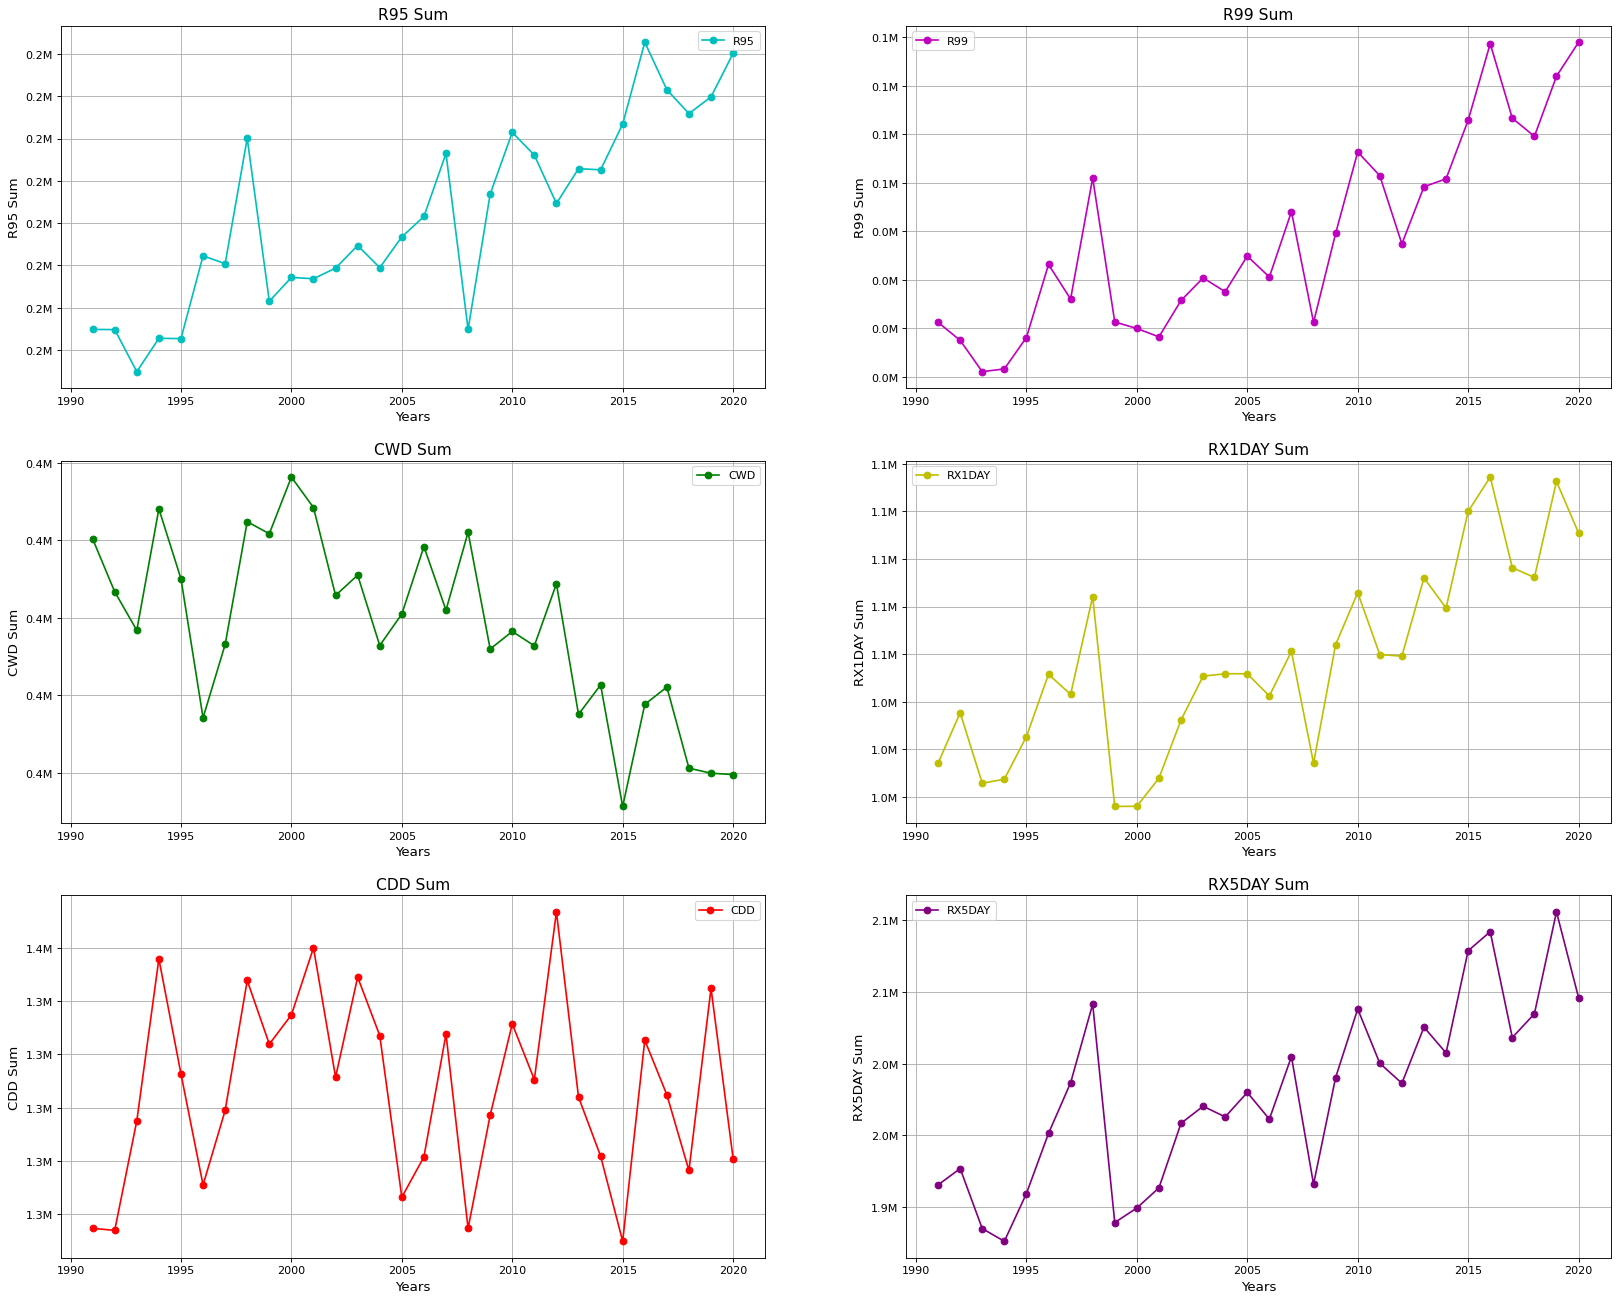

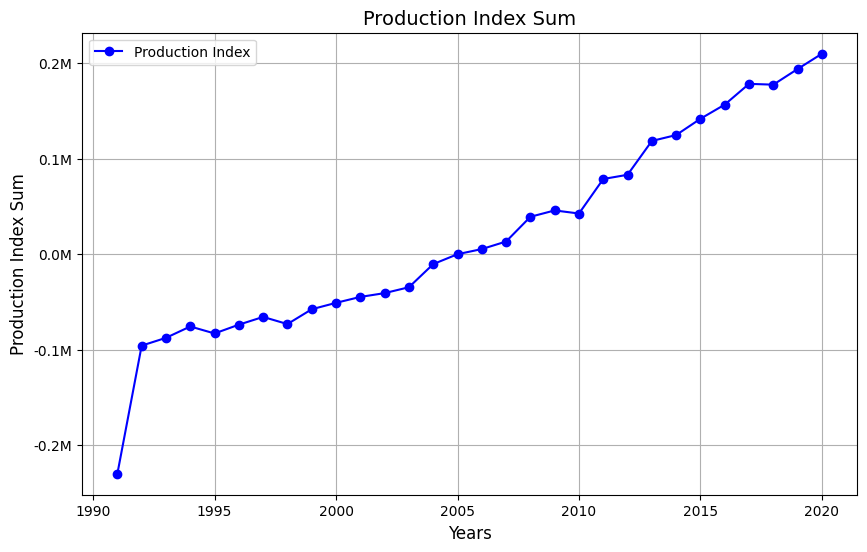

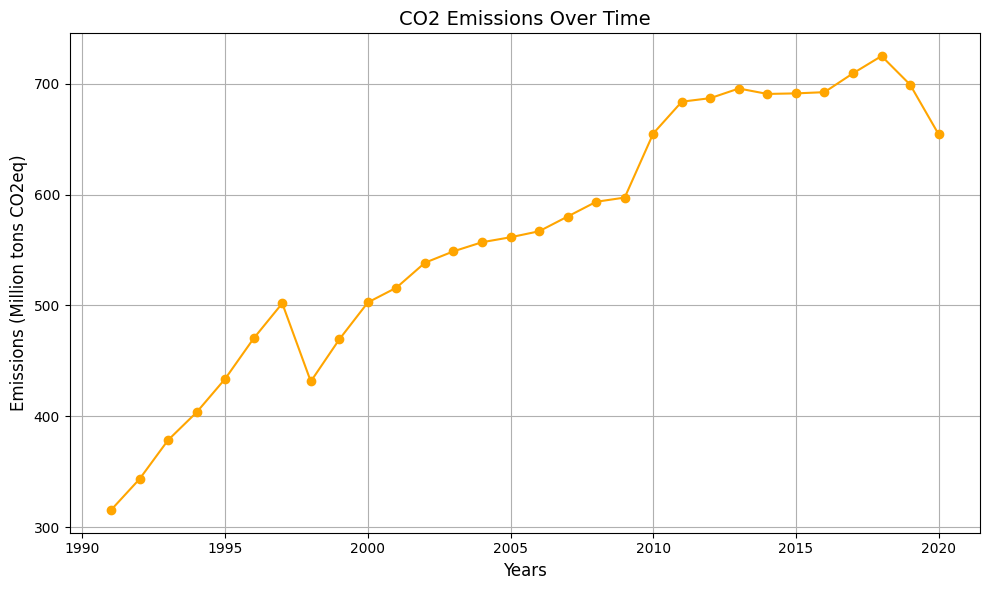

In [24]:
plot_extreme_rainfall_graphs(production_index_values, cwd, cdd, r95, r99, rx1day, rx5day,emissions )


In [29]:
import numpy as np
from scipy.stats import pearsonr

# emissions 데이터 (여기서는 예시로 주어진 값이 필요)
# emissions 예시 (단위: 백만 톤 CO2eq)
emissions = np.array([ 315.4, 343.4, 378.5, 403.6, 433.8, 470.3, 501.9, 431.4, 469.4, 502.7, 516.0, 
                      538.5, 548.8, 557.0, 561.5, 566.9, 580.2, 593.5, 597.3, 655.1, 683.8, 687.0, 695.7, 
                      690.8, 691.3, 692.4, 709.4, 725.0, 699.2, 654.4])
piv15 = np.nansum(production_index_values[14])

production_index_sum = [np.nansum(production_index_values[i])-piv15 for i in range(30)]

# production_index_sum 예시 데이터 (이미 계산된 값)
production_index_sum = np.array(production_index_sum)  # 앞서 계산한 production_index_sum을 사용

# 두 데이터의 길이 맞추기
assert len(production_index_sum) == len(emissions), "두 데이터의 길이가 맞지 않습니다."

# Pearson 상관계수 계산
corr, p_value = pearsonr(production_index_sum, emissions)

# 상관계수와 p-value 출력
print(f"상관계수 (Pearson): {corr:.3f}")
print(f"p-value: {p_value:.3f}")


상관계수 (Pearson): 0.932
p-value: 0.000


In [ ]:
import numpy as np
import scipy.stats as stats

# 예시 데이터 (실제 데이터는 이미 로드되어 있다고 가정)
# emissions, production_index_values, rx1day, rx5day, cdd, cwd, r95, r99 등의 데이터가 이미 로드되어 있음

# emissions 예시 (단위: 백만 톤 CO2eq)
emissions = np.array([315.4, 343.4, 378.5, 403.6, 433.8, 470.3, 501.9, 431.4, 469.4, 502.7, 516.0, 
                      538.5, 548.8, 557.0, 561.5, 566.9, 580.2, 593.5, 597.3, 655.1, 683.8, 687.0, 695.7, 
                      690.8, 691.3, 692.4, 709.4, 725.0, 699.2, 654.4])

# 예시 데이터로 production_index_sum 계산
piv15 = np.nansum(production_index_values[14])  # 이미 로드된 production_index_values 사용
production_index_sum = [np.nansum(production_index_values[i]) - piv15 for i in range(30)]
production_index_sum = np.array(production_index_sum)  # 앞서 계산한 production_index_sum을 사용

# Pearson 상관계수 계산 함수
def calculate_correlation(data1, data2):
    correlation, p_value = stats.pearsonr(data1, data2)
    return correlation, p_value

# Pearson 상관계수 및 p-value 계산 (production_index_sum과 emissions 간)
corr_emissions, p_value_emissions = calculate_correlation(production_index_sum, emissions)

# 예시로 CWD, CDD, R95, R99, RX1DAY, RX5DAY의 상관계수 및 p-value 계산
# 실제 데이터는 이미 로드되어 있다고 가정하고 각 배열을 사용
cwd_sum = [np.nansum(cwd[i]) for i in range(30)]
cdd_sum = [np.nansum(cdd[i]) for i in range(30)]
r95_sum = [np.nansum(r95[i]) for i in range(30)]
r99_sum = [np.nansum(r99[i]) for i in range(30)]
rx1day_sum = [np.nansum(rx1day[i]) for i in range(30)]
rx5day_sum = [np.nansum(rx5day[i]) for i in range(30)]

# 각 변수 간 상관계수 및 p-value 계산
cwd_corr, cwd_p_value = calculate_correlation(cwd_sum, production_index_sum)
cdd_corr, cdd_p_value = calculate_correlation(cdd_sum, production_index_sum)
r95_corr, r95_p_value = calculate_correlation(r95_sum, production_index_sum)
r99_corr, r99_p_value = calculate_correlation(r99_sum, production_index_sum)
rx1day_corr, rx1day_p_value = calculate_correlation(rx1day_sum, production_index_sum)
rx5day_corr, rx5day_p_value = calculate_correlation(rx5day_sum, production_index_sum)
cwdemissions_corr, cwdemissions_p_value = calculate_correlation(cwd_sum, emissions)

# 결과 출력
print('#','-'*10,'#')
print('production_index와 상관관계 및 p-value')
print(f"CO2와 상관계수 : {corr_emissions:.2f}, p-value: {p_value_emissions:.2f}")
print(f"CWD 상관계수: {cwd_corr:.2f}, p-value: {cwd_p_value:.2f}")
print(f"CDD 상관계수: {cdd_corr:.2f}, p-value: {cdd_p_value:.2f}")
print(f"R95 상관계수: {r95_corr:.2f}, p-value: {r95_p_value:.2f}")
print(f"R99 상관계수: {r99_corr:.2f}, p-value: {r99_p_value:.2f}")
print(f"RX1DAY 상관계수: {rx1day_corr:.2f}, p-value: {rx1day_p_value:.2f}")
print(f"RX5DAY 상관계수: {rx5day_corr:.2f}, p-value: {rx5day_p_value:.2f}")
print('#','-'*10,'#')
print('CO2와 상관관계 및 p-value')
print(f"CWD 상관계수: {cwdemissions_corr:.2f}, p-value: {cwdemissions_p_value:.2f}")


# ---------- #
production_index와 상관관계 및 p-value
CO2배출과 상관계수 : 0.93, p-value: 0.00
CWD 상관계수: -0.73, p-value: 0.00
CDD 상관계수: -0.01, p-value: 0.98
R95 상관계수: 0.83, p-value: 0.00
R99 상관계수: 0.85, p-value: 0.00
RX1DAY 상관계수: 0.81, p-value: 0.00
RX5DAY 상관계수: 0.77, p-value: 0.00
# ---------- #
CO2와 상관관계 및 p-value
CWD 상관계수: -0.63, p-value: 0.00


In [ ]:
import numpy as np
from scipy.stats import pearsonr

# emissions 데이터 (여기서는 예시로 주어진 값이 필요)
# emissions 예시 (단위: 백만 톤 CO2eq)
emissions = np.array([ 315.4, 343.4, 378.5, 403.6, 433.8, 470.3, 501.9, 431.4, 469.4, 502.7, 516.0, 
                      538.5, 548.8, 557.0, 561.5, 566.9, 580.2, 593.5, 597.3, 655.1, 683.8, 687.0, 695.7, 
                      690.8, 691.3, 692.4, 709.4, 725.0, 699.2, 654.4])
piv15 = np.nansum(production_index_values[14])

production_index_sum = [np.nansum(production_index_values[i])-piv15 for i in range(30)]

# production_index_sum 예시 데이터 (이미 계산된 값)
production_index_sum = np.array(production_index_sum)  # 앞서 계산한 production_index_sum을 사용

# 두 데이터의 길이 맞추기
assert len(production_index_sum) == len(emissions), "두 데이터의 길이가 맞지 않습니다."

# Pearson 상관계수 계산
corr, p_value = pearsonr(production_index_sum, emissions)

# 상관계수와 p-value 출력
print(f"상관계수 (Pearson): {corr:.3f}")
print(f"p-value: {p_value:.3f}")

목적: 기후변화에 따른 피해량 산출을 위한 자료.
소개: 2015년 기준 농업 생산량을 100으로 설정, 30년간 국가별 농업 생산량 증감 평균 지도.
양수 값: 해당 연도 생산량이 2015년보다 높음 (더 많은 농산물 생산).
음수 값: 해당 연도 생산량이 2015년보다 낮음 (생산량 감소).
0 값: 해당 연도 생산량이 2015년과 동일.
출처: FAOSTAT Database.


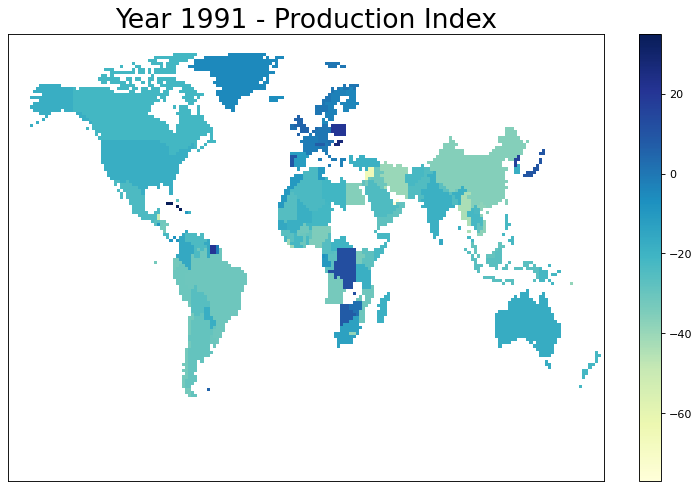

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML

# 새로운 플롯 생성 (1x1 그리드)
fig, axs = plt.subplots(1, 1, figsize=(10, 6), dpi=80, constrained_layout=True)
# 첫 번째 프레임의 데이터를 이용해 초기 colorbar를 생성
im11 = axs.imshow(production_index_values[0]-production_index_values[14], cmap='YlGnBu', alpha=1, origin='lower')
fig.colorbar(im11, ax=axs)
axs.set_xticks([])  # x축 눈금 없애기
axs.set_yticks([])  # y축 눈금 없애기
piv15 = np.nansum(production_index_values[24])

# 애니메이션 업데이트 함수
def update(i):
    im11.set_data(production_index_values[i]-production_index_values[14])  # 프레임에 맞는 데이터로 업데이트
    axs.set_title(f'Year {i + 1991} - Production Index', fontsize=24)  # 제목 업데이트

# 애니메이션 생성
ani = animation.FuncAnimation(fig, update, frames=len(production_index_values), interval=400)

# 애니메이션을 HTML로 변환하여 표시
html_animation = ani.to_jshtml()
html_animation = html_animation.replace('<video ', '<video autoplay loop width="600" height="450" ')



# 애니메이션을 HTML로 표시
HTML(html_animation)
print("목적: 기후변화에 따른 피해량 산출을 위한 자료.")
print("소개: 2015년 기준 농업 생산량을 100으로 설정, 30년간 국가별 농업 생산량 증감 평균 지도.")
print("양수 값: 해당 연도 생산량이 2015년보다 높음 (더 많은 농산물 생산).")
print("음수 값: 해당 연도 생산량이 2015년보다 낮음 (생산량 감소).")
print("0 값: 해당 연도 생산량이 2015년과 동일.")
print("출처: FAOSTAT Database.")


In [ ]:
np.nansum(production_index_values, axis=1)

(30, 192)

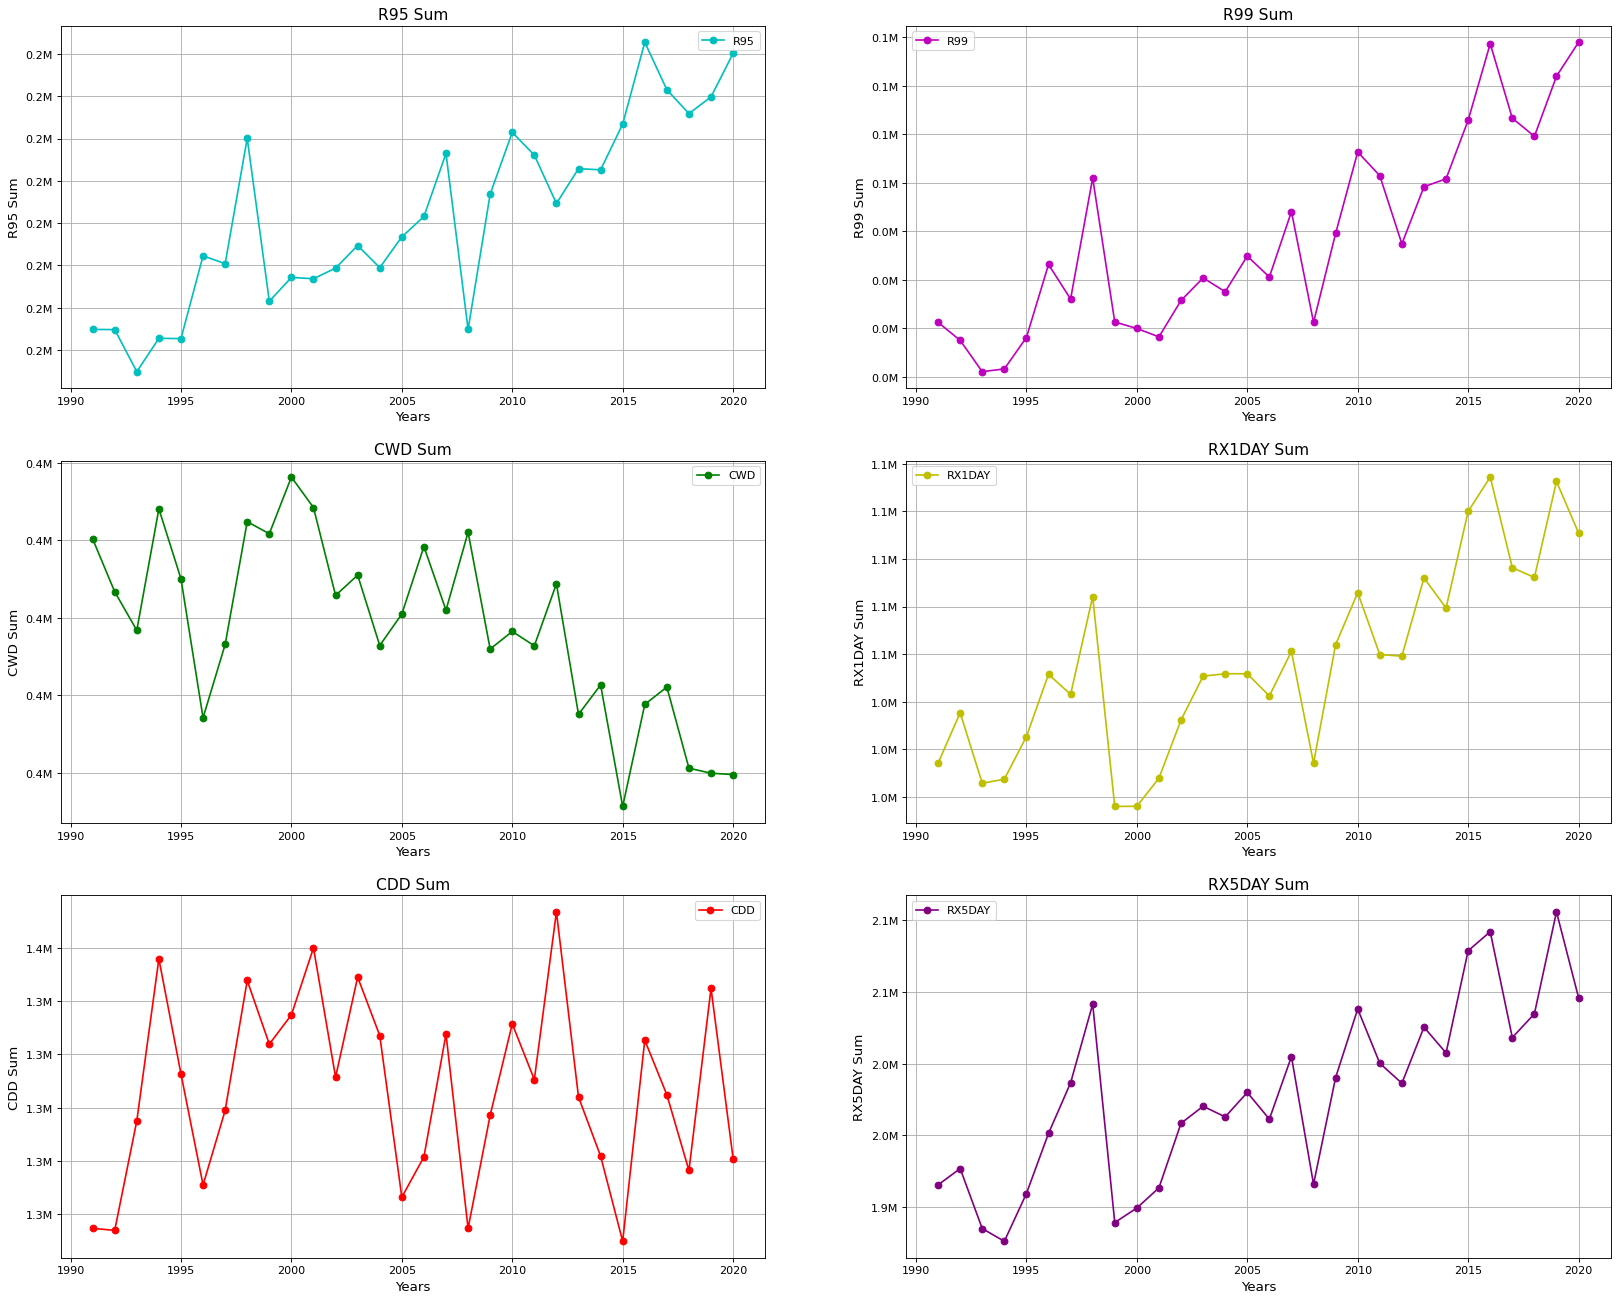

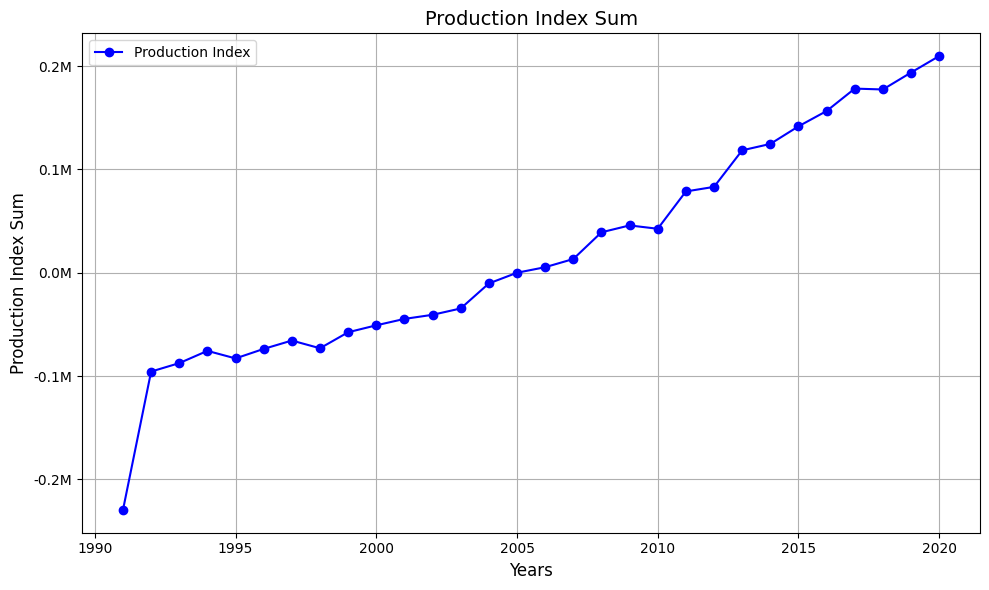

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

def plot_extreme_rainfall_graphs(production_index_values, cwd, cdd, r95, r99, rx1day, rx5day):
    """
    각 extreme rainfall 데이터를 기반으로 그래프를 그리는 함수입니다.
    """
    # x축을 1부터 30년으로 설정
    years = np.arange(1991, 2021)
    
    # 기준 값 (production_index_values[14]) 계산
    piv15 = np.nansum(production_index_values[14])

    # 각 데이터 항목의 연도별 합계 계산 후 piv15 빼기
    po = [np.nansum(rx1day[i]) for i in range(30)]
    co = [np.nansum(rx5day[i]) for i in range(30)]
    cdd_sum = [np.nansum(cdd[i]) for i in range(30)]
    cwd_sum = [np.nansum(cwd[i]) for i in range(30)]
    r95_sum = [np.nansum(r95[i]) for i in range(30)]
    r99_sum = [np.nansum(r99[i]) for i in range(30)]
    production_index_sum = [np.nansum(production_index_values[i])-piv15 for i in range(30)]

    # 서브플롯을 키우기 위해서 figsize 설정
    fig, axs = plt.subplots(3, 2, figsize=(25, 20), dpi=80)  # 그래프 크기를 더 크게 설정

    # Formatter 설정 (천 단위 구분 및 가독성 좋은 형식)
    def thousands_formatter(x, pos):
        return f'{x*1e-6:.1f}M'  # 1,000,000 단위로 표기

    # R95 그래프
    axs[0, 0].plot(years, r95_sum, marker='o', color='c', label='R95')
    axs[0, 0].set_xlabel('Years', fontsize=12)
    axs[0, 0].set_ylabel('R95 Sum', fontsize=12)
    axs[0, 0].set_title('R95 Sum', fontsize=14)
    axs[0, 0].grid(True)
    axs[0, 0].legend()
    axs[0, 0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # R99 그래프
    axs[0, 1].plot(years, r99_sum, marker='o', color='m', label='R99')
    axs[0, 1].set_xlabel('Years', fontsize=12)
    axs[0, 1].set_ylabel('R99 Sum', fontsize=12)
    axs[0, 1].set_title('R99 Sum', fontsize=14)
    axs[0, 1].grid(True)
    axs[0, 1].legend()
    axs[0, 1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # RX1DAY 그래프
    axs[1, 1].plot(years, po, marker='o', color='y', label='RX1DAY')
    axs[1, 1].set_xlabel('Years', fontsize=12)
    axs[1, 1].set_ylabel('RX1DAY Sum', fontsize=12)
    axs[1, 1].set_title('RX1DAY Sum', fontsize=14)
    axs[1, 1].grid(True)
    axs[1, 1].legend()
    axs[1, 1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # RX5DAY 그래프
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    axs[2,1].plot(years, co, marker='o', color='purple', label='RX5DAY')
    axs[2,1].set_xlabel('Years', fontsize=12)
    axs[2,1].set_ylabel('RX5DAY Sum', fontsize=12)
    axs[2,1].set_title('RX5DAY Sum', fontsize=14)
    axs[2,1].grid(True)
    axs[2,1].legend()
    axs[2,1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # CWD 그래프
    axs[1, 0].plot(years, cwd_sum, marker='o', color='g', label='CWD')
    axs[1, 0].set_xlabel('Years', fontsize=12)
    axs[1, 0].set_ylabel('CWD Sum', fontsize=12)
    axs[1, 0].set_title('CWD Sum', fontsize=14)
    axs[1, 0].grid(True)
    axs[1, 0].legend()
    axs[1, 0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # CDD 그래프
    axs[2, 0].plot(years, cdd_sum, marker='o', color='r', label='CDD')
    axs[2, 0].set_xlabel('Years', fontsize=12)
    axs[2, 0].set_ylabel('CDD Sum', fontsize=12)
    axs[2, 0].set_title('CDD Sum', fontsize=14)
    axs[2, 0].grid(True)
    axs[2, 0].legend()
    axs[2, 0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # Production Index 그래프
    ax2.plot(years, production_index_sum, marker='o', color='b', label='Production Index')
    ax2.set_xlabel('Years', fontsize=12)
    ax2.set_ylabel('Production Index Sum', fontsize=12)
    ax2.set_title('Production Index Sum', fontsize=14)
    ax2.grid(True)
    ax2.legend()
    ax2.yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

    # 서브플롯 간 간격을 넓히기 위해서 adjust 사용
    plt.subplots_adjust(hspace=0.5, wspace=0.4)  # 서브플롯 간 간격을 넓힘

    # 그래프 렌더링
    plt.tight_layout()
    plt.show()


plot_extreme_rainfall_graphs(production_index_values, cwd, cdd, r95, r99, rx1day, rx5day)
